# Installation

## Numeric python

Though mathematical operations can be performed in regular Python the NumPy module is often faster and more convenient. Most of this revolves around n-dimensional array objects which store regular arrays of data of a specified type (usually, but not limited to, numeric types). Such arrays can be used in a similar way to lists: they contain an ordered sequence of values and can be used in loops etc.

In [1]:
%matplotlib inline
import numpy as np  # Load the NumPy module, assign it the name "np" for convienence

l = [1,4,9,16,25] # A list
a = np.array(l)   # An array built from a list

print(l)
print(a)
print(type(a))

[1, 4, 9, 16, 25]
[ 1  4  9 16 25]
<class 'numpy.ndarray'>


However, an important idea with NumPy arrays is that operations can be performed on the array as a whole, rather than looping though all the component elements. This means that a fast internal implementation can be used. Also, it results in syntax similar to matrix algebra, where each variable is an entire array.

In [2]:
# Plain Python : loops
a = [1,2,3,4,5]
b = []
for x in a:
    b.append(a*3)
c = [x*x for x in a]    

# Numpy whole-array operations
a = np.array([1,2,3,4,5])
b = 3 * a   # All elements multiplied by three
c = a * a   # All elements squared
print(a)
print(b)
print(c)

[1 2 3 4 5]
[ 3  6  9 12 15]
[ 1  4  9 16 25]


An array will contain elements of the same data type. This data type is determined from the contents of the array when it is constructed.

In [3]:
y = np.array([2, 5, 1, 8, 0])
z = np.array([3.14129, 2.71828, 1.41421])

print(y.dtype)  # int - whole numbers
print(z.dtype)  # float - fixed precision real numbers

int64
float64


The data type of an array may be specifically stated (i.e. forced), irrespective of its initial elements. Also, the data type may be converted (making a new array in the process) using `astype()`.

In [4]:
y = np.array([2, 5, 1, 8, 0], float)  # Force float dtype
x = z.astype(int)                     # Convert to ints

print(y, y.dtype)
print(z, x)

[2. 5. 1. 8. 0.] float64
[3.14129 2.71828 1.41421] [3 2 1]


Many common operations are applied in an element-wise manner, i.e. to each value individually, and operations can work between two arrays if they have compatible sizes.

In [5]:
x = np.array([1.0, 2.0, 3.0])
y = np.array([3.0, 4.0, 5.0])

print(x + 2)    # Add 2 to all values
print(y / 2)    # Divide all values by 2

# Element-wise operations bewtween different arrays with compatible sizes
print(x + y)   
print(x * y)   
print(x - y)
print(x / y)

[3. 4. 5.]
[1.5 2.  2.5]
[4. 6. 8.]
[ 3.  8. 15.]
[-2. -2. -2.]
[0.33333333 0.5        0.6       ]


An array can have a number of different dimensions/axes, i.e. so that it can represent vectors, matrices tensors etc. For example a 2D array, with 'row' and 'column' axes could be created as follows:

In [6]:
x = np.array([[1,2,3],[4,5,6]])  # Make 2D array from list of lists
print(x)
print(x.shape)                   # (2,3) - rows x columns
print(x.size)                    # 6 - elements in total
print(x.ndim)                    # 2 - two axes

[[1 2 3]
 [4 5 6]]
(2, 3)
6
2


And similarly for a 3D array:

In [7]:
y = np.array([[[0,1], [2,3]], [[4,5], [6,7]], [[8,9], [10,11]]])
print(y)
print(y.shape)
print(y.ndim)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
(3, 2, 2)
3


The number of array axes can be fored to be larger than what is automatically suggested by the input.

In [39]:
z = np.array([0,1,4,9], ndmin=2)  # Forces a 2D array with one row
print(z)
print(z.shape)

[[0 1 4 9]]
(1, 4)


Operations are generally applied in an element-wise manner even when an array has multiple axes.

In [8]:
print(x * 0.01)  # Element-wise operation on 2D array

[[0.01 0.02 0.03]
 [0.04 0.05 0.06]]


Array creation from differently sized sub-collections works, but gives a 1D array of Python objects, which may not be the expected result...

In [9]:
x = np.array([[0,1], [2,3,4], [5,6,7,8]])
print(x, x.dtype)
print(2 * x)       # Each list is multiplied by two, not the elements inside

[list([0, 1]) list([2, 3, 4]) list([5, 6, 7, 8])] object
[list([0, 1, 0, 1]) list([2, 3, 4, 2, 3, 4])
 list([5, 6, 7, 8, 5, 6, 7, 8])]


Arrays are easily reshaped to change the number of rows, columns axes etc.

In [10]:
x = np.arange(1,101)     # The NumPy equivalent of range()
y = x.reshape(10,10)     # Same data as 10 rows x 10 columns (makes a new array)
print(y)
print(y.shape)
print(x.size, y.size)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]
(10, 10)
100 100


There are various functions to create particular kinds of filled arrays (e.g. all zeros), with a specified size/shape and a spefified data type for the elements.

In [54]:
a = np.zeros((2,3))           # 2 x 3 array full of 0.0
b = np.ones((3,2), int)       # 3 x 2 array full of 1
c = np.full(4, 7.0)           # array, length four, full of 7.0
d = np.identity(3)            # 3 x 3 identity (1.0 on diagonal 0.0 elsewhere) 
print(a)
print(b)
print(c)
print(d)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1 1]
 [1 1]
 [1 1]]
[7. 7. 7. 7.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Similarly, arrays can be created containing regular ranges of numbers, using start, end and step specifications.

In [55]:
x = np.arange(1.2, 4.4, 0.1)  # From 1.2 to <4.4 in steps of 0.1
y = np.linspace(1.2, 4.4, 5)  # From 1.2 to 4.4 in five even steps
z = np.logspace(2, 7, 5, base=10) # From 100 (10^2) to 10 million (10^7) in 5 even log_10 steps
print(x)
print(y)
print(z)

[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9
 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3]
[1.2 2.  2.8 3.6 4.4]
[1.00000000e+02 1.77827941e+03 3.16227766e+04 5.62341325e+05
 1.00000000e+07]


There is an index and range (slicing) syntax which is similar to that used with lists and strings etc.

In [12]:
x = np.arange(10) ** 2   # An array of sequential ints, squared
print(x)
print(x[2])         # number at index 2
print(x[1:4])       # slice range (makes new array)

[ 0  1  4  9 16 25 36 49 64 81]
4
[1 4 9]


Ranges may also have a third argument to specify the increment (step) 

In [13]:
print(x[2:9:2])   # Start at index 2, increment 2
print(x[::2])     # Every other element (start:end is implicit)
print(x[::-1])    # Negative increments means backwards (end:start implicit)

[ 4 16 36 64]
[ 0  4 16 36 64]
[81 64 49 36 25 16  9  4  1  0]


The indexing and slicing syntax for arrays with more than one axis uses a comma, such as `data[i,j]` for a 2-dimensional array. This differs from regular Python where separate brackets are needed for each sub-list, e.g. using `data[i][j]`. Accessing with multiple brackets will still work with NumPy arrays, but will be slower, as it makes an intermediate array.

In [14]:
y = np.arange(25).reshape(5,5)  # Two dimensional array
print(y)
print(y[2,3])     # One element specified with [Row, Column]
print(y[1:4,1:4]) # A range of rows and columns (makes a new array)
print(y[1,0:5])   # One entire row: all columns explicit
print(y[-1])      # The entire last row: columns implicit
print(y[-1,:])    # The entire last row, again 
print(y[:,2])     # One column (all rows)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
13
[[ 6  7  8]
 [11 12 13]
 [16 17 18]]
[5 6 7 8 9]
[20 21 22 23 24]
[20 21 22 23 24]
[ 2  7 12 17 22]


Tuples of indices may be specified to make selections from an array

In [15]:
idx = (0,2,4)      # Row/column indices
print(y[idx,:])    # Select specific rows, all columns
print(y[idx, idx]) # Select row, column pairs : (0,0) (2,2) (4,4)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]]
[ 0 12 24]


NumPy provides various mathematical functions, many of which are named like those in the standard Python `math` module. These operate on all the elements of an array, though they also work on single numbers. The functions will also accept regular iterable Python objects (lists or tuples etc.) as input, but a NumPy array is created where appropriate.

In [42]:
x = range(1,5)
print(np.sqrt(x))   # Square root
print(np.exp(x))    # E to the power
print(np.log(x))    # Natural log
print(np.mod(x, 2)) # Modular arithmetic : remainder in base 2

[1.         1.41421356 1.73205081 2.        ]
[ 2.71828183  7.3890561  20.08553692 54.59815003]
[0.         0.69314718 1.09861229 1.38629436]
[1 0 1 0]


In [44]:
y = [3.14129, 2.71828, 1.41421, -0.70717]
print(np.abs(y))      # absolute/positive value
print(np.round(y, 3)) # round to 3 d.p.
print(np.ceil(y))     # whole number above (as float type)
print(np.floor(y))    # whole number below (as float type)

[3.14129 2.71828 1.41421 0.70717]
[ 3.141  2.718  1.414 -0.707]
[ 4.  3.  2. -0.]
[ 3.  2.  1. -1.]


In [47]:
z = np.radians([30.0, 60.0, 90.0, 135.0]) # Convert degrees to redians
print(z)
c = np.cos(z)        # Cosine 
print(c)
print(np.arccos(c))  # Inverse cosine

[0.52359878 1.04719755 1.57079633 2.35619449]
[ 8.66025404e-01  5.00000000e-01  6.12323400e-17 -7.07106781e-01]
[0.52359878 1.04719755 1.57079633 2.35619449]


There are various methods inbuilt into an array object, for example to calculate sums, extrema, mean and standard deviation. Without extra arguments these consider all elements of the array, irrespective of array shape.

In [17]:
x = np.array([[3,9], [3,1], [5,7]])

print(x.min())          # minimum value (of all elements)
print(x.max())          # maximum value
print(x.sum())          # summation
print(x.mean())         # mean
print(x.std())          # standard devaiation

1
9
28
4.666666666666667
2.6874192494328497


These methods accept an `axis` specification so that the operation is performed multiple times along that array direction, thus generating a new array. It might be semantically confusing as to which axis number should be used to operate over rows or columns etc. For example, in a 2D array to get the summation for all rows you do `arr.sum(axis=1)`. The key idea here is that the sums are done over the column axis (`=1`) to give a value for each row.

In [18]:
print(x.max(axis=0))    # max along row axis : a value for each column
print(x.sum(axis=1))    # sum along column axis : a value for each row
print(x.mean(axis=1))   # mean along column axis : a value for each row

[5 9]
[12  4 12]
[6. 2. 6.]


Comparison operations between arrays generate Boolean arrays giving `True` or `False` for each elemental comparison.

In [19]:
x = np.array([1, 8, 9, 3])
y = np.array([5, 0, 3, 7])
z = x > y
print(z)

[False  True  True False]


Element selections from arrays can be made by passing such arrays of `True` and `False` values (for each axis). This technique of using a 'mask' extends the index (row, column) based slection already shown.

In [20]:
print(x)
print(z)
print(x[z])

[1 8 9 3]
[False  True  True False]
[8 9]


Boolean masks can also be used to set a subset of array elements. For example here the negative values are set to zero.

In [21]:
x = np.array([3,-5,1,-2,-7,8,0])
y = x.copy() # A copy of the original x
z = x < 0    # Z has True for negative elements of x

print(x)
print(z)     # Boolean mask
x[z] = 0     # Negative elements in x set to zero
print(y)     # Original
print(x)     # Modified

[ 3 -5  1 -2 -7  8  0]
[False  True False  True  True False False]
[ 3 -5  1 -2 -7  8  0]
[3 0 1 0 0 8 0]


Sometimes it is handy to convert from a Boolean array to indices, e.g. to know which (row, column) values are true. For this `nonzero()` can be used get a tuple representing the positions of the true (non-zero) elements. 

In [22]:
idx = z.nonzero()        # Positions, for each axis, where z is true (x negative)
print(idx)
print(y[idx])            # Values in y where z was true

(array([1, 3, 4]),)
[-5 -2 -7]


In a similar manner `argsort()` can be used to get the indices of an array in value order, which can then be used for sorting.

In [23]:
y = np.array([9,2,7,1,5,3,6,1])
idx = y.argsort()  # An array of element positions, from smallest to largest value

print(idx)
print(y[idx])      # Values from y at sorted positions : makes a sorted array

[3 7 1 5 4 6 2 0]
[1 1 2 3 5 6 7 9]


Also `argmax` and `argmin` can be used to get the index positions of extrema.

In [24]:
idx = y.argmin()   #  Position of min value
print(idx)
print(y[idx])

x = np.array([[1,3,2], [0,1,3]])
idx = x.argmax(axis=1)  # The axis 1 (column) position for each row's max
print(idx)

3
1
[1 2]


There are many functions that relate to matrix operations and linear algebra, for example to calculate various products (inner, outer, cross), to transpose and find inverse matrices:

In [25]:
x = np.array(((1,1),(1,0)))
y = np.array(((0,1),(1,1)))
print(np.dot(x, y))               # dot product (=matrix multiplication for >1D)

x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.transpose())              # swap rows with cols)

x = np.array(((1,1),(1,0)))
print(np.linalg.inv(y))           # inverse transform

[[1 2]
 [0 1]]
[[1 4]
 [2 5]
 [3 6]]
[[-1.  1.]
 [ 1.  0.]]


NumPy has a number of handy submodules such as the very useful `random` module for pseudo-random number generation.

In [26]:
from numpy.random import uniform, normal # Import from sub-module

# Sample uniform distribution
a = uniform(0.0, 2.0, (5,5)) # From [0, 2), as 5 by 5 array
print(a)

# Sample normal distribution
b = normal(0.0, 2.5, 10)  # Mean 0.0, SD 2.5, 10 values as flat array
print(b)

[[0.54270115 1.59358938 1.11831589 0.82605381 1.86153   ]
 [1.34098747 0.52474026 0.3417802  1.8568199  0.0493579 ]
 [0.17186495 1.52037579 0.11664447 1.49577195 1.22796629]
 [1.72559662 1.68102056 1.77092465 0.8277872  1.14053303]
 [1.95405882 1.85520764 1.08897013 1.31206257 0.36126325]]
[ 1.55095476 -0.36966646  2.97515396 -1.32105794  0.00691228 -0.73653554
  1.9781036   2.55940679 -3.794551    0.49983632]


There is alos the `fft` module for Fourier transforms

In [27]:
from math import pi

l = 0.04
w = 0.1
t = np.arange(0.0, 10.0, 1.0)         # A range of time values
x = np.exp(2j*pi*w*t) * np.exp(-l*t)  # Wave equation using complex numbers
y = np.fft.fft(x)                     # Fast Fourier transform array of wave
print(x)
print(y)

[ 1.        +0.00000000e+00j  0.77729498+5.64737863e-01j
  0.28525864+8.77935817e-01j -0.27407349+8.43511461e-01j
 -0.68939881+5.00877552e-01j -0.81873075+1.00265600e-16j
 -0.63639531-4.62368256e-01j -0.23355002-7.18793052e-01j
  0.22439239-6.90608774e-01j  0.564432  -4.10083855e-01j]
[0.19922964+5.05208755e-01j 8.40793773-8.77421717e-16j
 0.19922964-5.05208755e-01j 0.17437383-2.26620355e-01j
 0.1698753 -1.19690096e-01j 0.16848419-5.35360769e-02j
 0.16813634+2.08166817e-16j 0.16848419+5.35360769e-02j
 0.1698753 +1.19690096e-01j 0.17437383+2.26620355e-01j]


NumPy installations include the matplotlib module, which provides the ability to make graphs. For example, plotting the above.

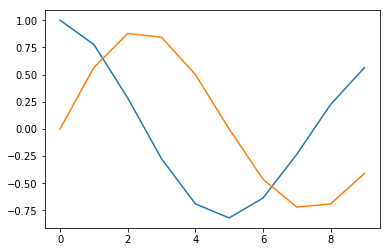

In [37]:
from matplotlib import pyplot as plt

plt.plot(x.real)
plt.plot(x.imag)

#x_vals = arange(1000)
#y_vals = random.poisson(5, 1000)
#pyplot.scatter(x_vals, y_vals, s=4, marker='*') # Make scatter plot
#pyplot.savefig("TestGraph.png", dpi=72)         # Save graph as an image
plt.show()                                   # Show on screen

SciPy is an extensive library that builds upon the NumPy arrays and their functions. It provides specialized scientific functionality for areas including further linear algebra, optimization, integration, interpolation, signal processing, image processing and differential equations. Below a simple example is given, showing the ndimage sub-module which is useful for reading and writing image pixel data. 

In [29]:
from scipy import ndimage
img_file = 'examples/my_image.png'
pixmap = ndimage.imread(img_file)     # Read image data as array

height, width, channels = pixmap.shape           
red_channel   = pixmap[:,:,0]         # Color channels are last axis
green_channel = pixmap[:,:,1]

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


FileNotFoundError: [Errno 2] No such file or directory: 'examples/my_image.png'

# Principle component analysis with NumPy

The below function illustrates the use of the NumPy module and performs a principle component analysis: treating input data as vectors it finds the orthogonal directions in the data of maximal variance (the Eigenvectors of the covariance matrix). This is often used on high-dimensionality data to create simpler representations that still preserve the most important features. The function takes two arguments, the input data, which assumed to be equivalent to a list of vectors, and the number of principle components to extract. There is a small complication in this function as linalg.eig() outputs a matrix (p_comp_mat below) where each Eigenvector is a column, rather than a row. This orientation is useful for applying the matrix as a transformation, as we demonstrate below. Though, in the code it means the matrix is sorted and selected on its last axis (using [:,:n] etc.). Also, this is why the transpose, pcomps.T is used when extracting the two vectors.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def get_principle_components(data, n=2):

  data = np.array(data)               # Convert input to array

  mean = data.mean(axis=0)            # Mean vector
  centred_data = (data - mean).T      # Centre all vectors and transpose

  covar = np.cov(centred_data)        # Get covariance matrix
  evals, evecs = np.linalg.eig(covar) # Get Eigenvalues and Eigenvectors

  indices = evals.argsort()[::-1]     # E. value indices by decreasing size

  evecs = evecs[:,indices]            # Sort Eigenvecs according to Eigenvals
  
  p_comp_mat = evecs[:,:n]            # Select required principle components

  return p_comp_mat

The function is tested using some random 3D data. Here the random module from NumPy is used to create three clusters of vector points. Initially each has the same mean (0.0) and standard deviation (0.5), but the last two clusters are transposed by adding an offset vector. The clusters are concatenated together (along the long axis) to create the final test dataset with three ‘blobs’.

In [ ]:
size = (100, 3)                     # 100 points times 3 dimensions
d1 = random.normal(0.0, 0.5, size) 
d2 = random.normal(0.0, 0.5, size) + array([4.0, 1.0, 2.0])
d3 = random.normal(0.0, 0.5, size) + array([2.0, 0.0, -1.0])
test_data = concatenate([d1, d2, d3], axis=0)

pcomps = get_principle_components (test_data, n=2)   # Run PCA

The principle components are given back as a matrix, albeit in transposed form:

In [ ]:
pc1, pc2 = pcomps.T   # Extract the two PC vectors from columns

for x, y, z in (pc1, pc2):
  x *= 10             # Scale value so it can be seen better on graph       
  y *= 10
  pyplot.plot((0, x), (0, y))  # Plot PC x, y as line from origin (0,0)

x, y, x = test_data.T          # Extract x and y vals from transpose

pyplot.scatter(x, y, s=20, c='#0080FF', marker='o', alpha=0.5)
pyplot.show()

The principle component matrix can be used to transform the test data. Here the first two principle components are used as new X and Y axis directions, illustrating that the transformation gives a better separated 2D view of the data.

In [ ]:
transformed = dot(test_data, pcomps)

x, y = transformed.T
pyplot.scatter(x, y, s=20, c='#FF0000', marker='^')
pyplot.show()

# Statistics using SciPy

SciPy provides objects representing random variables for a variety of different statistical distributions. These are created by specifying the particular parameters for the distribution (e.g. mean and standard deviation for normal/Gaussian). Here a Poisson distribution is illustrated. A random variable object is created from which we access the probability mass function pmf(). This generates the probabilities of the input values, according to the probability distribution.

In [ ]:
from scipy.stats import norm, poisson

poisson_rand_var = poisson(2.0)       # Random variable object

x_xals = arange(0, 10, 1)             # Value to plot probabilities for
y_vals = poisson_rand_var.pmf(x_xals) # Get probabilities from distrib.

pyplot.plot(x_xals, y_vals, color='black') # Make line plot 
pyplot.show()                              # Show on screen

The next SciPy statistics example uses the random variable objects in a different way, to perform a tailed-test, as would be done to estimate a p-value: the probability of obtaining a value (or more extreme) from a given random distribution with stated parameters. The function performs the test on an input array of numbers for a normal distribution with given mean value, mv and standard deviation, std. There is an option to state if we want to do a one- or two-tailed test, i.e. consider only values on the same side of the mean or both sides.

In [ ]:
def normal_tail_test(values, mv, std, one_sided=True):
  
  norm_rv = norm(mv, std)     # Normal distrib. random variable object
  
  diffs = abs(values-mv)         # Calc differences from distrib. mean
  result = norm_rv.cdf(mv-diffs) # Use cumulative density function
  
  if not one_sided:              # Two-tailed test
    result *= 2                  # Distrib. is symmetric: double area

  return result

The function can be tested given some parameters and test values. In this case the values could represent the heights of male humans.

In [ ]:
mean    = 1.76
std_dev = 0.075
values  = array([1.8, 1.9, 2.0])

result = normal_tail_test (values, mean, std_dev, one_sided=True)
print('Normal one-tail', result)         # [0.297, 0.03097, 0.000687]

# Plotting DNA read quality scores from FASTQ files

Next the examples move on to illustrate handling high-throughput sequencing data. First we will work with FASTQ sequence read format and will handle this directly in standard Python, though in the next example an external module, pysam is used to deal with the file reading and etc.

The objective for the following function is to read a stated number of quality scores from each sequence read of a FASTQ file and plot these as a graph. Naturally, the function takes the name of the file to read as an input argument, as well as a number of nucleotide positions to look at: this could be the whole read length or shorter. The operation of the function is fairly simple as it reads the lines of the file and collects quality scores. However, because the FASTQ format consists of four lines for each entry (annotation, sequence, annotation and qualities) the lines are read in groups of four using readline() and a while loop. There is a slight complication because the data can be shorter than our requested read length (some sequences terminate early). In such cases we extend the quality data with a padding string containing spaces that allows all quality data to be analysed in the same way (the padding spaces give zeros sores). It is notable that the quality scores in FASTQ files are stored as characters; one for each position in the DNA read sequence. These characters are converted to numeric values by the NumPy fromstring() function; each character is converted into its ASCII code number and the smallest value (32 for a space) is subtracted to get scores ranging from zero.

In [ ]:
from numpy import array, zeros, fromstring, int8, arange
from matplotlib import pyplot

def plot_fastq_qualities(fastq_file, read_len=100):
    
  file_obj = open(fastq_file)    # Open FASTQ file for reading

  qual_scores = []               # Initial scores are empty list

  line = file_obj.readline()     # Read first line (a header)
  pad = ' ' * read_len           # Lots of spaces (to pad short data)

  while line: # Continue looping while there are more lines

    seq = file_obj.readline()    # Sequence line; not used 
    head = file_obj.readline()   # Second header line; not used 
    codes = file_obj.readline()  # Quality score code line; used
    codes = codes.strip()        # Remove trailing newline char etc  

    if len(codes) < read_len:    # If quality code string too short
      codes += pad               # Extend with spaces
 
    codes = codes[:read_len]     # Chop codes string to desired length
 
    qvals = fromstring(codes, dtype=int8) # Convert string to numbers
    qvals -= 32                  # Set lowest possible value to zero
    
    qual_scores.append(qvals)    # Add qual. scores for this seq to list
    line = file_obj.readline()   # Read next header line
 
  qual_scores = array(qual_scores)   # Convert final list to array
  positions = arange(1, read_len+1)  # Make array of seq. positions

  ave_scores = qual_scores.mean(axis=0)  # Find mean for each position
  st_devs = qual_scores.std(axis=0)      # Standard dev. for each pos.

  # Plot errorbars of stardard dev. height at score positions
  pyplot.errorbar(positions, ave_scores, yerr=st_devs, color='red')

  # Plot a line graph of scores on top
  pyplot.plot(positions, ave_scores, color='black', linewidth=2)

  pyplot.show()

fastq_file = '/data/My_DNA_sample.fastq' # Test FASTQ file location
plot_fastq_qualities(fastq_file)